In [1]:
import datetime
from maroma.lab.stockdatastore import StockDataStore
from maroma.lab.calculator import Calculator
from maroma.lab.plotter import Plotter
from examples.eventstudy.exampleeventmatrix import ExampleEventMatrix

Building event matrix
Number of events:16


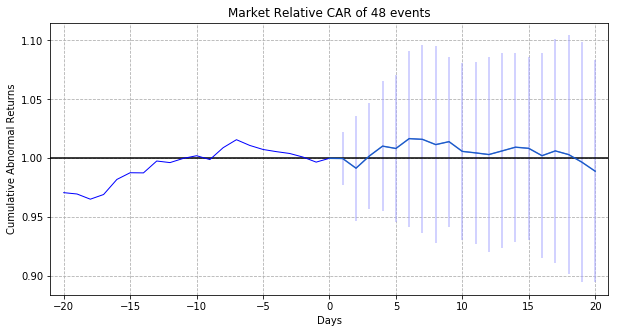

In [7]:

# Define the symbols to study
symbols = ['S1', 'S2', 'S3']

# Define the market symbol to compare against
market_symbol = "MKT"

# Add the market symbol to the symbols list to get it's data too
symbols.append(market_symbol)

# Define the start and end date of the study
start_date = datetime.datetime(2009, 1, 1)
end_date = datetime.datetime(2016, 12, 31)
value_threshold = 7
look_back = 20
look_forward = 20
csv_file_name = 'examples/eventstudy/data/eventdates.csv'

#print("Collecting historical stock data")
keys = ['close', 'adjusted_close']
# Get a pandas multi-indexed dataframe indexed by datetime and symbol
stock_data_store = StockDataStore('examples/eventstudy/data/')
stock_data = stock_data_store.get_stock_data(symbols, keys)
#print(stock_data.head())

print("Building event matrix")
eem = ExampleEventMatrix(stock_data.index.levels[1], symbols, 
                         value_threshold, csv_file_name)

# Get a dataframe with an index of all trading days, and columns of all symbols.
event_matrix = eem.build_event_matrix(start_date, end_date)

print("Number of events:" + str(len(event_matrix[(event_matrix == 1.0).any(axis=1)])))
#print(event_matrix[(event_matrix == 1.0).any(axis=1)])

calculator = Calculator()
car, std_err, num_events = calculator.calculate_car_qstk(
    event_matrix, stock_data['close'], market_symbol, look_back, look_forward)

plotter = Plotter()
plotter.plot_car(car, std_err, num_events,look_back, look_forward)